## 1. Introdução

Artes marciais mistas (MMA) é um esporte de combate de contato que permite golpear e agarrar, tanto em pé quanto no chão, usando técnicas de outros esportes de combate e artes marciais. O Ultimate Fighting Championship (UFC) é uma organização americana de artes marciais mistas sediada em Las Vegas, Nevada e é a maior promoção de MMA do mundo. Além disso, o UFC apresenta os lutadores mais bem classificados do esporte. Sediado nos Estados Unidos, essa competição produz eventos em todo o mundo que mostram doze divisões de peso e cumprem as Regras Unificadas de Artes Marciais Mistas. Este é um esporte altamente imprevisível.

O objetivo do trabalho é analisar a suposta 'imprevisibilidade' do UFC/MMA e tentar descobrir quais fatores presentes em um lutador podem ou não aumentar a possibiliadde de vitória. Os dados aqui utilizados foram retirados de um dataset do site _kaggle_ , que recolhe dados de lutas realizadas no UFC, bem como as principais características dos participantes de cada uma delas. Algumas características dos dados serão analisadas a seguir.

### 1.1 Importando dependências e abrindo o banco

Analisando os dados abaixo, é importante ressaltar que  cada linha do dataset é relativa a uma luta. As colunas que se iniciam com a letra 'R' são referentes ao lutador _RED_, ou seja o lutador _vermelho_. Assim como aquelas colunas que se iniciam com a letra 'B'  são relativos ao lutador _azul_. Essa é uma forma que o esporte utiliza de identificar os lutadores. Essa classificação de _vermelho_ ou _azul_ também será discutida posteriormente.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import scipy as spy
import seaborn as sns

In [2]:
# Definindo as colunas que serão utilizadas 
columns = [
    "date",
    "R_fighter",  # R = red (lutador 'vermelho')
    "B_fighter",  # B = blue (lutador 'azul')
    "Winner",
    "weight_class",
    "no_of_rounds",
    "B_wins", 
    "R_wins", 
    "B_losses", 
    "R_losses", 
    "B_age", 
    "R_age", 
    "R_Height_cms",
    "R_Reach_cms",
    "R_Weight_lbs",
    "B_Height_cms",
    "B_Reach_cms",
    "B_Weight_lbs",
    "R_Stance",
    "B_Stance"
]
data = pd.read_csv("ufcdata/data.csv",encoding='latin-1', usecols=columns)
data.head()

,R_fighter,B_fighter,date,Winner,weight_class,no_of_rounds,B_losses,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_losses,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,2019-06-08,Red,Bantamweight,5,1.0,4.0,Orthodox,167.64,170.18,135.0,2.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,2019-06-08,Red,Women's Flyweight,5,6.0,4.0,Orthodox,167.64,167.64,125.0,2.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,2019-06-08,Red,Lightweight,3,8.0,23.0,Orthodox,185.42,185.42,155.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,2019-06-08,Blue,Bantamweight,3,0.0,4.0,Switch,170.18,170.18,135.0,2.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,2019-06-08,Blue,Heavyweight,3,1.0,1.0,Southpaw,180.34,185.42,250.0,1.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


## 2. Exploração dos dados

## 2.1 Número médio de rounds por ano

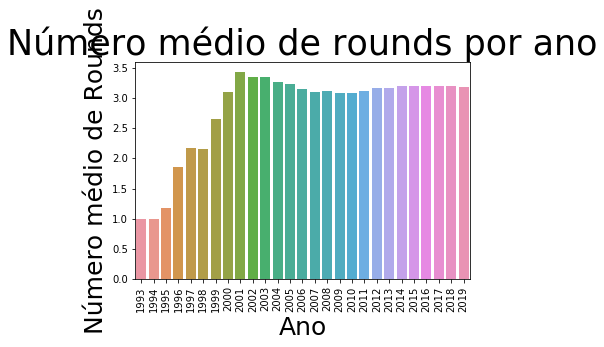

In [3]:
# get db copy
dbcopy = data.copy()

# get only year of date
year = []
for index,row in data.iterrows():
    year.append(row.date[0:4])

# add year in db copy    
dbcopy['year'] = year

years = [
    '2019','2018','2017',     
    '2016','2015','2014','2013',
    '2012','2011','2010','2009',
    '2008','2007','2006','2005',
    '2004','2003','2002','2001',
    '2000','1999','1998','1997',
    '1996','1995','1994','1993'
    ]

#rounds_per_year = dbcopy.groupby('year')
r = dbcopy[['no_of_rounds','year']]

indexYear = 0
mean = 0
roundsArrayMean = []
iterator = 0



for index,line in r.iterrows():
    if (index == len(r)-1):
        mean = mean/iterator
        roundsArrayMean.append(mean)
        
    if(line.year == years[indexYear]):
        mean = line.no_of_rounds + mean
        iterator = iterator + 1
    else:
        mean = mean/iterator
        roundsArrayMean.append(mean)
        mean = 0
        iterator = 0
        indexYear = indexYear + 1
        mean = line.no_of_rounds + mean
        iterator = iterator + 1
        
Data = {
    'Year': years,
    'Mean': roundsArrayMean
}
df = pd.DataFrame(Data, columns=['Year', 'Mean'])
        
chart = sns.barplot(x='Year',y='Mean', data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

# set chart size
sns.set(rc={'figure.figsize':(18.7,10.27)})
# Título do plot
plt.title("Número médio de rounds por ano", fontsize=35)
# Nome do eixo x
plt.xlabel('Ano', fontsize=25)
# Nome do eixo y
plt.ylabel('Número médio de Rounds', fontsize=25)
plt.show()

A análise dos dados acima permite concluir que lutas ocorridas na década de 90 tendem a ter um número menor de rounds. Isso provavelmente está relacionado com a própria evolução do esporte(das próprias regras em si) e também da qualidade dos lutadores, que tendem a realizar lutas mais demoradas (onde não ocorre nocaute). 

## 2.2 Número de vitórias por lutador (quem é o mais vitorioso?)

In [4]:
dbcopy = data.copy()
winners = []
for index,row in dbcopy.iterrows():
    if (row.Winner == 'Red'):
        winners.append(row.R_fighter)
    else:
        winners.append(row.B_fighter)
        
victoryCount = []
for winner in winners:
    victoryCount.append(winners.count(winner))
    
Data = {
    'Fighter': winners,
    'WinsCount': victoryCount
}
df = pd.DataFrame(Data, columns=['Fighter', 'WinsCount'])
df = df.drop_duplicates()
df = df.sort_values(by=['WinsCount'], ascending=False).reset_index()
df.head()

,index,Fighter,WinsCount
0,50,Donald Cerrone,23
1,1269,Michael Bisping,20
2,199,Demian Maia,20
3,793,Georges St-Pierre,20
4,149,Jon Jones,19


Nessa tabela temos o ranking de lutadores por número de vitórias. Especificamente, os cinco lutadores mais vitoriosos da história do UFC.

## 2.3 Postura de luta mais vitoriosa (em porcentagem)

Explicando uma pouco melhor, cada lutador possui a chamada _postura de luta_. Essa postura define como os braços e as pernas estão posicionados e qual dos lados (esquerdo ou direito) é o principal para atacar e o principal para defender. Aqui, será analisado qual postura tem maior porcentagem de vitória.

,Stance,WinsCount,LossCount,VictoryPercentage
0,Orthodox,3781,3855,49.515453
1,Southpaw,1063,948,52.859274
2,Switch,165,153,51.886792
4,Open Stance,13,11,54.166667
5,Sideways,2,4,33.333333


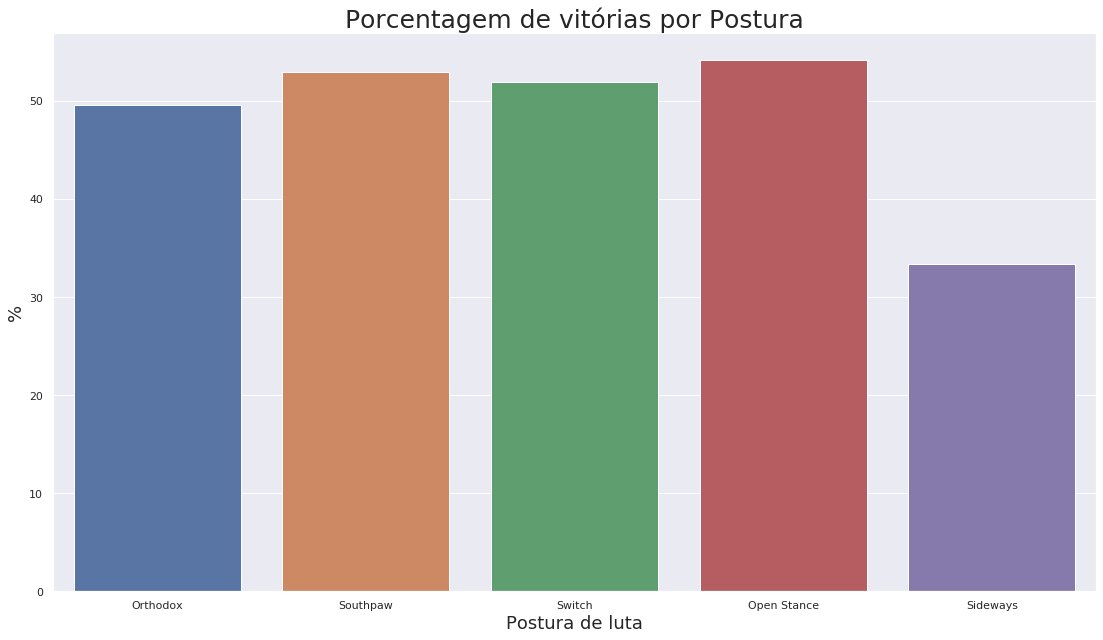

In [5]:
dbcopy = data.copy()
stancesWinners = []
stancesLosers = []
for index, row in dbcopy.iterrows():
    if (row.Winner == 'Red'):
        stancesWinners.append(row.R_Stance)
        stancesLosers.append(row.B_Stance)
    else:
        stancesWinners.append(row.B_Stance)
        stancesLosers.append(row.R_Stance)

victoryCount = []
for stance in stancesWinners:
    victoryCount.append(stancesWinners.count(stance))

loserCount = []
for stance in stancesLosers:
    loserCount.append(stancesLosers.count(stance))

Data = {
    'Stance': stancesWinners,
    'WinsCount': victoryCount
}
df = pd.DataFrame(Data, columns=['Stance', 'WinsCount'])
df = df.drop_duplicates()
df = df.sort_values(by=['WinsCount'], ascending=False)
#display(df)

Data2 = {
    'Stance': stancesLosers,
    'LossCount': loserCount
}
df2 = pd.DataFrame(Data2, columns=['Stance', 'LossCount'])
df2 = df2.drop_duplicates()
df2 = df2.sort_values(by=['LossCount'], ascending=False)
#display(df2)

merged_inner = pd.merge(left=df,right=df2, left_on='Stance', right_on='Stance')
merged_inner = merged_inner.dropna()

percentageArray = []

for index,row in merged_inner.iterrows():
    percentage = (row.WinsCount/(row.WinsCount + row.LossCount))*100
    percentageArray.append(percentage)
    
merged_inner['VictoryPercentage'] = percentageArray
display(merged_inner)

chart = sns.barplot(x='Stance',y='VictoryPercentage', data=merged_inner)
#chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

# set chart size
#sns.set(rc={'figure.figsize':(18.7,10.27)})

# Título do plot
plt.title("Porcentagem de vitórias por Postura", fontsize=25)
# Nome do eixo x
plt.xlabel('Postura de luta', fontsize=18)
# Nome do eixo y
plt.ylabel('%', fontsize=18)
plt.show()

A análise dos dados permite concluir que a postura masi vitoriosa é a _Open Stace_, porém vale ressaltar que ela foi utlizada nas lutas do UFC um número bastante pequeno de vezes quando comparada com outras posturas (então não existem tantos dados para avaliação). Além disso, aquelas que são utilizadas com frequência possuem uma porcentagem de vitórias bem parecida (em torno de 50%). Mesmo assim, dessas, a melhor classificada é a _South Paw_. 

## Regressão Linear

In [8]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)